# Non-Quoted

In [1]:
import pandas as pd
import numpy as np
import pickle 

### Read CSVs

In [ ]:
df_au = pd.read_csv('AU_domestic_Ngram_stopword_lematize.csv', usecols=['article_text_Ngram_stopword_lemmatize'])
print("finished reading au")
df_bd = pd.read_csv('BD_domestic_Ngram_stopword_lematize.csv', usecols=['article_text_Ngram_stopword_lemmatize'])
print("finished reading bd")
df_ca = pd.read_csv('CA_domestic_Ngram_stopword_lematize.csv', usecols=['article_text_Ngram_stopword_lemmatize'])
print("finished reading ca")
df_gb = pd.read_csv('GB_domestic_Ngram_stopword_lematize.csv', usecols=['article_text_Ngram_stopword_lemmatize'])
print("finished reading gb")
df_gh = pd.read_csv('GH_domestic_Ngram_stopword_lematize.csv', usecols=['article_text_Ngram_stopword_lemmatize'])
print("finished reading gh")
df_hk = pd.read_csv('HK_domestic_Ngram_stopword_lematize.csv', usecols=['article_text_Ngram_stopword_lemmatize'])
print("finished reading hk")
df_ie = pd.read_csv('IE_domestic_Ngram_stopword_lematize.csv', usecols=['article_text_Ngram_stopword_lemmatize'])
print("finished reading ie")
df_in = pd.read_csv('IN_domestic_Ngram_stopword_lematize.csv', usecols=['article_text_Ngram_stopword_lemmatize'])
print("finished reading in")
df_jm = pd.read_csv('JM_domestic_Ngram_stopword_lematize.csv', usecols=['article_text_Ngram_stopword_lemmatize'])
print("finished reading jm")
df_ke = pd.read_csv('KE_domestic_Ngram_stopword_lematize.csv', usecols=['article_text_Ngram_stopword_lemmatize'])
print("finished reading ke")
df_lk = pd.read_csv('LK_domestic_Ngram_stopword_lematize.csv', usecols=['article_text_Ngram_stopword_lemmatize'])
print("finished reading lk")
df_my = pd.read_csv('MY_domestic_Ngram_stopword_lematize.csv', usecols=['article_text_Ngram_stopword_lemmatize'])
print("finished reading my")
df_ng = pd.read_csv('NG_domestic_Ngram_stopword_lematize.csv', usecols=['article_text_Ngram_stopword_lemmatize'])
print("finished reading ng")
df_nz = pd.read_csv('NZ_domestic_Ngram_stopword_lematize.csv', usecols=['article_text_Ngram_stopword_lemmatize'])
print("finished reading nz")
df_ph = pd.read_csv('PH_domestic_Ngram_stopword_lematize.csv', usecols=['article_text_Ngram_stopword_lemmatize'])
print("finished reading ph")
# df_pk = pd.read_csv('PK_domestic_Ngram_stopword_lematize.csv', usecols=['article_text_Ngram_stopword_lemmatize'])
# print("finished reading pk")
df_sg = pd.read_csv('SG_domestic_Ngram_stopword_lematize.csv', usecols=['article_text_Ngram_stopword_lemmatize'])
print("finished reading sg")
df_tz = pd.read_csv('TZ_domestic_Ngram_stopword_lematize.csv', usecols=['article_text_Ngram_stopword_lemmatize'])
print("finished reading tz")
df_us = pd.read_csv('US_domestic_Ngram_stopword_lematize.csv', usecols=['article_text_Ngram_stopword_lemmatize'])
print("finished reading us")
# df_za = pd.read_csv('ZA_domestic_Ngram_stopword_lematize.csv', usecols=['article_text_Ngram_stopword_lemmatize'])
# print("finished reading za")

# display(df_au)

In [ ]:
### concate to make all countries show in one big table

df_2010to2020 = pd.concat([df_au,df_bd,df_ca,df_gb,df_gh,df_hk,df_ie,df_in,df_jm,df_ke,df_lk,df_my,df_ng,df_nz,df_ph,df_sg,df_tz,df_us], axis=1)
df_2010to2020.columns = ['txtfiles_au','txtfiles_bd','txtfiles_ca','txtfiles_gb','txtfiles_gh','txtfiles_hk',
                         'txtfiles_ie','txtfiles_in','txtfiles_jm','txtfiles_ke','txtfiles_lk','txtfiles_my',
                         'txtfiles_ng','txtfiles_nz','txtfiles_ph','txtfiles_sg','txtfiles_tz','txtfiles_us']
# display(df_2010to2020)

### Removing Named Entities

In [ ]:
# ### Use Terminal or Command prompt and type in the following command after installing spacy:
# ### python -m spacy download en_core_web_sm

# import spacy

# ### load spacy model
# nlp = spacy.load('en_core_web_sm')

In [ ]:
# ### Method 1 Named Entity Recognition (NER) on original articles using Spacy
# ### Taking too long... and finally IOPub data rate exceeded.

# keys_to_remove = []
# for article in df_2010to2020.txtfiles_au.dropna():
#     doc = nlp(article)
#     for ent in doc.ents:
#         keys_to_remove.append(ent.text)
# print(keys_to_remove)

In [ ]:
### Method 2 Named Entity Recognition (NER) on (word, count) tuple using Spacy
### reference: https://www.geeksforgeeks.org/text-preprocessing-in-python-set-1/
### reference: https://www.geeksforgeeks.org/removing-stop-words-nltk-python/

In [ ]:
### Remove numbers

import re
def remove_numbers(text):
    result = re.sub(r'\d+', '', text)
    return result

In [ ]:
### Remove punctuation

import string
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

In [ ]:
### Stopwords recognition

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words('english'))
stop_words = set(stopwords.words('english'))

In [ ]:
### Countries recognition
### https://pytutorial.com/python-extract-country-from-text

countries = ['Afghanistan', 'Aland Islands', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia, Plurinational State of', 'Bonaire, Sint Eustatius and Saba', 'Bosnia and Herzegovina', 'Botswana', 'Bouvet Island', 'Brazil', 'British Indian Ocean Territory', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Christmas Island', 'Cocos (Keeling) Islands', 'Colombia', 'Comoros', 'Congo', 'Congo, The Democratic Republic of the', 'Cook Islands', 'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Falkland Islands (Malvinas)', 'Faroe Islands', 'Fiji', 'Finland', 'France', 'French Guiana', 'French Polynesia', 'French Southern Territories', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Gibraltar', 'Greece', 'Greenland', 'Grenada', 'Guadeloupe', 'Guam', 'Guatemala', 'Guernsey', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Heard Island and McDonald Islands', 'Holy See (Vatican City State)', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran, Islamic Republic of', 'Iraq', 'Ireland', 'Isle of Man', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jersey', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', "Korea, Democratic People's Republic of", 'Korea, Republic of', 'Kuwait', 'Kyrgyzstan', "Lao People's Democratic Republic", 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Macao', 'Macedonia, Republic of', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta', 'Marshall Islands', 'Martinique', 'Mauritania', 'Mauritius', 'Mayotte', 'Mexico', 'Micronesia, Federated States of', 'Moldova, Republic of', 'Monaco', 'Mongolia', 'Montenegro', 'Montserrat', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nauru', 'Nepal', 'Netherlands', 'New Caledonia', 'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'Niue', 'Norfolk Island', 'Northern Mariana Islands', 'Norway', 'Oman', 'Pakistan', 'Palau', 'Palestinian Territory, Occupied', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Pitcairn', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Réunion', 'Romania', 'Russian Federation', 'Rwanda', 'Saint Barthélemy', 'Saint Helena, Ascension and Tristan da Cunha', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Martin (French part)', 'Saint Pierre and Miquelon', 'Saint Vincent and the Grenadines', 'Samoa', 'San Marino', 'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia', 'Seychelles', 'Sierra Leone', 'Singapore', 'Sint Maarten (Dutch part)', 'Slovakia', 'Slovenia', 'Solomon Islands', 'Somalia', 'South Africa', 'South Georgia and the South Sandwich Islands', 'Spain', 'Sri Lanka', 'Sudan', 'Suriname', 'South Sudan', 'Svalbard and Jan Mayen', 'Swaziland', 'Sweden', 'Switzerland', 'Syrian Arab Republic', 'Taiwan, Province of China', 'Tajikistan', 'Tanzania, United Republic of', 'Thailand', 'Timor-Leste', 'Togo', 'Tokelau', 'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Turkmenistan', 'Turks and Caicos Islands', 'Tuvalu', 'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States', 'United States Minor Outlying Islands', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela, Bolivarian Republic of', 'Viet Nam', 'Virgin Islands, British', 'Virgin Islands, U.S.', 'Wallis and Futuna', 'Yemen', 'Zambia', 'Zimbabwe']
map_countries = (map(lambda x: x.lower(), countries))
countries = list(map_countries)
print(countries)

In [ ]:
### Manually recognize other named entities
### https://pytutorial.com/python-extract-country-from-text

othr_manu = ['abuja', 'africa', 'african', 'ahmed', 'al', 'arican', 'asia', 'auckland', 'australian', 'bangabandhu', 'bangla', 'bangladeshi', 'bbc', 'british', 'buhari', 'ca', 'canadian', 'canadians', 'chinese', 'chittagong', 'cork', 'dhaka', 'dublin', 'dunedin', 'eu', 'european', 'galway', 'ghanaian', 'ghanaians', 'hasina', 'hossain', 'hong', 'indian', 'irish', 'islam', 'kenyan', 'kenyans', 'khan', 'john', 'jonathan', 'kenyatta', 'kong', 'lagos', 'lee', 'london', 'maori', 'melbourne', 'michael', 'mombasa', 'nairobi', 'nigerian', 'nigerians', 'nsw', 'nt', 'nz', 'otago', 'ottawa', 'ontario', 'rahman', 'raila', 'ruto', 'singaporeans', 'sydney', 'tanzania', 'tanzanian', 'tanzanians', 'toronto', 'trump', 'uk', 'upazila', 'vancouver', 'wellington', 'zanzibar', 'zealand']
map_othr_manu = (map(lambda x: x.lower(), othr_manu))
othr_manu = list(map_othr_manu)
print(othr_manu)

### Counting Top 300 Words

In [ ]:
### input: dataframe serie
### output: a dictionary in which key is the word, value is the count        

def count_words(country_serie):

    # create a dictionary. If key doesn't exist, set its value to be 0, otherwise its value + 1
    counts = {}
    for article in country_serie:
        article = remove_numbers(article)
        article = remove_punctuation(article)
        words = article.lower().split()
        for word in words:
            if word not in stop_words:
                if word not in countries:
                    if word not in othr_manu:
                        counts[word] = counts.get(word, 0) + 1
            
    return counts

In [ ]:
### input: a dictionary of words and counts, top_value
### output: a list of tuple (word, count) for top_value most

def rank_tuples(counts,top_value):
    
    # use tuple to exchange key and value
    lst = list()
    for key, val in counts.items():
        newtup = (val, key)
        lst.append(newtup)

    # sort by value in pair and get the most 300
    # sortedLst contains tuples (val, key)
    sortedLst = sorted(lst, reverse=True)[:top_value]
    
    # exchange key and value back
    resLst = list()
    for val, key in sortedLst:
        newtup = (key, val)
        resLst.append(newtup)
        
    return resLst

In [ ]:
# ### input: a dataframe serie
# ### output: name_entity appeared in top500 

# def ner500(country_serie):
#     words_country_2010to2020 = ''
#     top500_country_2010to2020 = rank_tuples(count_words(country_serie),500)
#     for key, val in top500_country_2010to2020:
#         words_country_2010to2020 += (key + ' ')
        
#     # load data
#     doc = nlp(words_country_2010to2020)
 
#     # print entities
#     name_entity = []
#     for ent in doc.ents:
#         name_entity.append(ent.text)
        
#     return name_entity

In [ ]:
def most300(country_serie):
    counts = count_words(country_serie)
    count_country_2010to2020 = rank_tuples(counts,300)
    return count_country_2010to2020

In [ ]:
# ### input: country_serie (for example: df_2010to2020.txtfiles_au.dropna()).
# ### if not dropna(), error
# ### output: a list that consists of the most frequent 300 pairs (key: word + value: occurance times) for 2010to2020

# def most300(country_serie):
#     counts = count_words(country_serie)
    
#     # pop all pairs in which keys are not words
#     keys_to_remove = ner500(country_serie)
    
#     for key in keys_to_remove:
#         counts.pop(key, None)
    
#     count_country_2010to2020 = rank_tuples(counts,300)
#     return count_country_2010to2020

In [ ]:
### calculate the most frequent 300 words for each country 2010to2020

count_au_2010to2020 = most300(df_2010to2020.txtfiles_au.dropna())
print('finished counting au')
count_bd_2010to2020 = most300(df_2010to2020.txtfiles_bd.dropna())
print('finished counting bd')
count_ca_2010to2020 = most300(df_2010to2020.txtfiles_ca.dropna())
print('finished counting ca')
count_gb_2010to2020 = most300(df_2010to2020.txtfiles_gb.dropna())
print('finished counting gb')
count_gh_2010to2020 = most300(df_2010to2020.txtfiles_gh.dropna())
print('finished counting gh')
count_hk_2010to2020 = most300(df_2010to2020.txtfiles_hk.dropna())
print('finished counting hk')
count_ie_2010to2020 = most300(df_2010to2020.txtfiles_ie.dropna())
print('finished counting ie')
count_in_2010to2020 = most300(df_2010to2020.txtfiles_in.dropna())
print('finished counting in')
count_jm_2010to2020 = most300(df_2010to2020.txtfiles_jm.dropna())
print('finished counting jm')
count_ke_2010to2020 = most300(df_2010to2020.txtfiles_ke.dropna())
print('finished counting ke')
count_lk_2010to2020 = most300(df_2010to2020.txtfiles_lk.dropna())
print('finished counting lk')
count_my_2010to2020 = most300(df_2010to2020.txtfiles_my.dropna())
print('finished counting my')
count_ng_2010to2020 = most300(df_2010to2020.txtfiles_ng.dropna())
print('finished counting ng')
count_nz_2010to2020 = most300(df_2010to2020.txtfiles_nz.dropna())
print('finished counting nz')
count_ph_2010to2020 = most300(df_2010to2020.txtfiles_ph.dropna())
print('finished counting ph')
# count_pk_2010to2020 = most300(df_2010to2020.txtfiles_pk.dropna())
# print('finished counting pk')
count_sg_2010to2020 = most300(df_2010to2020.txtfiles_sg.dropna())
print('finished counting sg')
count_tz_2010to2020 = most300(df_2010to2020.txtfiles_tz.dropna())
print('finished counting tz')
count_us_2010to2020 = most300(df_2010to2020.txtfiles_us.dropna())
print('finished counting us')
# count_za_2010to2020 = most300(df_2010to2020.txtfiles_za.dropna())
# print('finished counting za')

In [ ]:
with open('nonquoted_count_au.pkl', 'wb') as f:
    pickle.dump(count_au_2010to2020, f)
    
with open('nonquoted_count_bd.pkl', 'wb') as f:
    pickle.dump(count_bd_2010to2020, f)
    
with open('nonquoted_count_ca.pkl', 'wb') as f:
    pickle.dump(count_ca_2010to2020, f)
    
with open('nonquoted_count_gb.pkl', 'wb') as f:
    pickle.dump(count_gb_2010to2020, f)
    
with open('nonquoted_count_gh.pkl', 'wb') as f:
    pickle.dump(count_gh_2010to2020, f)
    
with open('nonquoted_count_hk.pkl', 'wb') as f:
    pickle.dump(count_hk_2010to2020, f)
    
with open('nonquoted_count_ie.pkl', 'wb') as f:
    pickle.dump(count_ie_2010to2020, f)
    
with open('nonquoted_count_in.pkl', 'wb') as f:
    pickle.dump(count_in_2010to2020, f)
    
with open('nonquoted_count_jm.pkl', 'wb') as f:
    pickle.dump(count_jm_2010to2020, f)
    
with open('nonquoted_count_ke.pkl', 'wb') as f:
    pickle.dump(count_ke_2010to2020, f)
    
with open('nonquoted_count_lk.pkl', 'wb') as f:
    pickle.dump(count_lk_2010to2020, f)
    
with open('nonquoted_count_my.pkl', 'wb') as f:
    pickle.dump(count_my_2010to2020, f)
    
with open('nonquoted_count_ng.pkl', 'wb') as f:
    pickle.dump(count_ng_2010to2020, f)
    
with open('nonquoted_count_nz.pkl', 'wb') as f:
    pickle.dump(count_nz_2010to2020, f)
    
with open('nonquoted_count_ph.pkl', 'wb') as f:
    pickle.dump(count_ph_2010to2020, f)
    
with open('nonquoted_count_sg.pkl', 'wb') as f:
    pickle.dump(count_sg_2010to2020, f)

with open('nonquoted_count_tz.pkl', 'wb') as f:
    pickle.dump(count_tz_2010to2020, f)
    
with open('nonquoted_count_us.pkl', 'wb') as f:
    pickle.dump(count_us_2010to2020, f)

### Start Running Here with Pickle

In [2]:
with open('nonquoted_count_au.pkl', 'rb') as f:
    count_au_2010to2020 = pickle.load(f)

with open('nonquoted_count_bd.pkl', 'rb') as f:
    count_bd_2010to2020 = pickle.load(f)
    
with open('nonquoted_count_ca.pkl', 'rb') as f:
    count_ca_2010to2020 = pickle.load(f)

with open('nonquoted_count_gb.pkl', 'rb') as f:
    count_gb_2010to2020 = pickle.load(f)
    
with open('nonquoted_count_gh.pkl', 'rb') as f:
    count_gh_2010to2020 = pickle.load(f)

with open('nonquoted_count_hk.pkl', 'rb') as f:
    count_hk_2010to2020 = pickle.load(f)
    
with open('nonquoted_count_ie.pkl', 'rb') as f:
    count_ie_2010to2020 = pickle.load(f)

with open('nonquoted_count_in.pkl', 'rb') as f:
    count_in_2010to2020 = pickle.load(f)
    
with open('nonquoted_count_jm.pkl', 'rb') as f:
    count_jm_2010to2020 = pickle.load(f)

with open('nonquoted_count_ke.pkl', 'rb') as f:
    count_ke_2010to2020 = pickle.load(f)
    
with open('nonquoted_count_lk.pkl', 'rb') as f:
    count_lk_2010to2020 = pickle.load(f)

with open('nonquoted_count_my.pkl', 'rb') as f:
    count_my_2010to2020 = pickle.load(f)
    
with open('nonquoted_count_ng.pkl', 'rb') as f:
    count_ng_2010to2020 = pickle.load(f)

with open('nonquoted_count_nz.pkl', 'rb') as f:
    count_nz_2010to2020 = pickle.load(f)
    
with open('nonquoted_count_ph.pkl', 'rb') as f:
    count_ph_2010to2020 = pickle.load(f)

with open('nonquoted_count_sg.pkl', 'rb') as f:
    count_sg_2010to2020 = pickle.load(f)
    
with open('nonquoted_count_tz.pkl', 'rb') as f:
    count_tz_2010to2020 = pickle.load(f)

with open('nonquoted_count_us.pkl', 'rb') as f:
    count_us_2010to2020 = pickle.load(f)

In [3]:
print('-------------------------------------------------------')
print('au')
for key, val in count_au_2010to2020:
    print(key, val)
    
print('-------------------------------------------------------')
print('bd')
for key, val in count_bd_2010to2020:
    print(key, val)
    
print('-------------------------------------------------------')
print('ca')
for key, val in count_ca_2010to2020:
    print(key, val)
    
print('-------------------------------------------------------')
print('gb')
for key, val in count_gb_2010to2020:
    print(key, val)
    
print('-------------------------------------------------------')
print('gh')
for key, val in count_gh_2010to2020:
    print(key, val)
    
print('-------------------------------------------------------')
print('hk')
for key, val in count_hk_2010to2020:
    print(key, val)
    
print('-------------------------------------------------------')
print('ie')
for key, val in count_ie_2010to2020:
    print(key, val)
    
print('-------------------------------------------------------')
print('in')
for key, val in count_in_2010to2020:
    print(key, val)
    
print('-------------------------------------------------------')
print('jm')
for key, val in count_jm_2010to2020:
    print(key, val)
    
print('-------------------------------------------------------')
print('ke')
for key, val in count_ke_2010to2020:
    print(key, val)
    
print('-------------------------------------------------------')
print('lk')
for key, val in count_lk_2010to2020:
    print(key, val)
    
print('-------------------------------------------------------')
print('my')
for key, val in count_my_2010to2020:
    print(key, val)
    
print('-------------------------------------------------------')
print('ng')
for key, val in count_ng_2010to2020:
    print(key, val)
    
print('-------------------------------------------------------')
print('nz')
for key, val in count_nz_2010to2020:
    print(key, val)
    
print('-------------------------------------------------------')
print('ph')
for key, val in count_ph_2010to2020:
    print(key, val)
    
# print('-------------------------------------------------------')
# print('pk')
# for key, val in count_pk_2010to2020:
#     print(key, val)
    
print('-------------------------------------------------------')  
print('sg')
for key, val in count_sg_2010to2020:
    print(key, val)
    
print('-------------------------------------------------------')
print('tz')
for key, val in count_tz_2010to2020:
    print(key, val)
    
print('-------------------------------------------------------')
print('us')
for key, val in count_us_2010to2020:
    print(key, val)
    
# print('-------------------------------------------------------')
# print('za')
# for key, val in count_za_2010to2020:
#     print(key, val)

-------------------------------------------------------
au
year 135829
time 101589
get 96855
make 96536
would 95995
go 87408
people 83523
new 79958
also 77935
like 74099
take 70347
well 68041
work 65297
use 63169
come 57937
first 56680
see 55109
could 52312
government 51413
need 51268
day 51260
look 49389
last 48063
think 47621
back 46592
know 46195
way 45224
include 45206
world 43408
game 43401
good 41834
want 41427
per 41009
give 40168
even 39976
many 39804
high 39342
market 38879
may 38747
much 38186
company 37342
show 37231
week 36986
change 36415
big 35031
thing 34908
right 34122
around 34019
business 34002
report 33506
still 33440
cent 32790
team 32367
start 32114
home 31942
really 31655
great 31546
information 31393
state 31243
million 31080
play 30909
life 30449
service 30043
provide 29713
point 29583
us 29490
part 29396
old 29149
long 29125
month 28800
car 28543
end 28349
call 28030
best 27925
country 27753
help 27699
next 26735
place 26042
run 25766
family 25757
number 25520


love 19004
amp 18820
today 18790
talk 18728
law 18720
might 18611
different 18557
mean 18489
former 18460
future 18318
receive 18279
industry 18247
visit 18244
able 18242
level 18208
question 18198
six 18181
development 18068
learn 17981
third 17876
risk 17796
low 17749
charge 17727
grow 17649
pay 17631
return 17627
interest 17623
product 17515
water 17453
press 17425
away 17420
early 17381
officer 17369
personal 17352
lose 17332
read 17216
food 17197
record 17194
federal 17190
live 17183
hour 17162
province 17161
hand 17118
later 17106
ago 17103
late 17064
sell 17009
book 16955
power 16952
happen 16940
decision 16880
international 16814
however 16803
already 16691
study 16660
postmedia 16659
seem 16625
social 16583
problem 16574
kind 16456
research 16435
th 16398
important 16299
friend 16290
allow 16271
article 16242
hit 16213
director 16143
agree 16100
act 16027
sign 16017
pm 15997
financial 15911
less 15881
bc 15859
force 15788
real 15780
almost 15741
fact 15737
far 15726
hockey 156

level 15349
content 15321
never 15304
five 15286
feature 15228
ensure 15042
late 15021
store 15020
cookie 14881
centre 14773
believe 14744
issue 14714
without 14502
love 14480
friend 14432
health 14366
road 14306
head 14282
news 14263
find 14180
top 14075
online 14066
street 13899
result 13892
always 13859
increase 13814
left 13775
office 13744
per 13701
press 13673
full 13616
comment 13525
hospital 13428
garda 13407
six 13390
base 13365
live 13301
open 13292
pm 13286
away 13262
co 13245
council 13202
bank 13092
post 13069
allow 13066
feel 12991
free 12977
face 12886
target 12859
plan 12822
minister 12800
something 12773
name 12722
sport 12635
us 12619
return 12564
hour 12378
record 12376
party 12347
little 12343
former 12326
keep 12303
park 12284
league 12243
past 12173
social 12082
age 12012
line 11935
car 11931
job 11920
close 11765
form 11731
law 11703
small 11665
available 11663
offer 11630
men 11586
across 11568
lose 11550
hand 11531
term 11506
later 11366
yea 11352
early 11326
a

force 3634
order 3631
family 3619
large 3607
view 3584
trade 3577
team 3570
act 3567
must 3565
education 3564
much 3557
long 3550
former 3538
point 3498
parliament 3494
event 3476
want 3416
week 3414
show 3406
another 3358
among 3351
result 3349
secretary 3322
look 3301
mahinda 3283
land 3276
set 3271
name 3241
ltte 3240
nation 3222
term 3221
several 3199
central 3191
hand 3185
security 3169
great 3158
action 3158
person 3145
create 3137
south 3123
face 3108
interest 3102
water 3063
authority 3036
information 2992
process 2990
commission 2979
billion 2945
council 2944
best 2940
prime 2935
global 2891
meeting 2880
health 2877
home 2850
chief 2844
unp 2839
old 2824
open 2817
post 2812
next 2802
woman 2789
cause 2789
start 2784
told 2779
price 2763
investment 2761
house 2754
continue 2748
plan 2744
economy 2723
note 2719
programme 2713
opportunity 2707
sirisena 2705
department 2691
receive 2686
offer 2686
director 2685
still 2682
growth 2679
experience 2679
every 2679
united 2663
officer 

low 15529
however 15451
job 15405
win 15346
member 15336
us 15334
international 15259
follow 15197
every 14970
large 14870
money 14827
rate 14726
pay 14490
staff 14484
open 14412
top 14374
believe 14291
ask 14132
interest 14062
property 13981
find 13947
term 13930
head 13926
result 13914
project 13793
continue 13752
little 13746
share 13710
return 13705
something 13674
rugby 13659
car 13571
decision 13534
left 13480
story 13454
medium 13444
small 13409
face 13394
sell 13393
centre 13109
road 13105
key 12981
future 12933
never 12890
might 12761
across 12705
court 12703
student 12691
risk 12623
happen 12578
already 12558
able 12551
bank 12531
farm 12528
past 12518
six 12456
experience 12420
name 12407
comment 12406
man 12397
always 12391
state 12378
act 12363
university 12349
mean 12318
feel 12301
north 12260
night 12248
live 12165
season 12142
opportunity 12124
side 12116
without 12110
information 12051
turn 12030
hour 12012
different 11970
land 11959
away 11930
later 11914
early 11897


access 3372
job 3364
security 3358
key 3354
model 3337
young 3311
mean 3299
hour 3299
rate 3294
june 3294
site 3288
billion 3278
close 3257
really 3256
idea 3250
personal 3244
order 3237
problem 3233
general 3228
authority 3221
challenge 3215
agency 3212
car 3211
important 3207
source 3204
south 3200
line 3197
pm 3186
total 3183
platform 3183
woman 3165
opportunity 3162
policy 3135
love 3130
within 3126
partner 3112
less 3109
together 3105
risk 3104
past 3103
network 3103
whether 3100
full 3092
cause 3086
accord 3078
trade 3066
capital 3058
ministry 3054
age 3053
hand 3045
executive 3031
facebook 3026
strong 3013
investor 3013
email 3010
money 3006
name 3004
property 2999
lot 2995
process 2994
space 2988
example 2986
board 2986
drive 2985
range 2974
foreign 2971
charge 2971
rise 2962
-------------------------------------------------------
tz
government 11861
country 10885
year 10079
also 8838
dar 8327
e 8068
salaam 7764
make 6824
people 6782
use 6746
business 5994
development 5923
woul

### All Peaceful and Non-peaceful words

In [4]:
### put all non-peaceful words into non-peace dictionary (key: word; val: count)
### put all peaceful words into peace dictionary (key: word; val: count)
### if key is the same, val = sum(val)
    
nonpeace_wrd_dict = {}
peace_wrd_dict = {}
    
### get all words from non-peaceful countries    
for key, val in count_bd_2010to2020:
    nonpeace_wrd_dict[key] = nonpeace_wrd_dict.get(key, 0) + val
    
for key, val in count_ke_2010to2020:
    nonpeace_wrd_dict[key] = nonpeace_wrd_dict.get(key, 0) + val
    
for key, val in count_ng_2010to2020:
    nonpeace_wrd_dict[key] = nonpeace_wrd_dict.get(key, 0) + val   
    
for key, val in count_tz_2010to2020:
    nonpeace_wrd_dict[key] = nonpeace_wrd_dict.get(key, 0) + val

### get all words from peaceful countries
for key, val in count_au_2010to2020:
    peace_wrd_dict[key] = peace_wrd_dict.get(key, 0) + val
    
for key, val in count_ca_2010to2020:
    peace_wrd_dict[key] = peace_wrd_dict.get(key, 0) + val
    
for key, val in count_gb_2010to2020:
    peace_wrd_dict[key] = peace_wrd_dict.get(key, 0) + val
    
for key, val in count_ie_2010to2020:
    peace_wrd_dict[key] = peace_wrd_dict.get(key, 0) + val
    
for key, val in count_nz_2010to2020:
    peace_wrd_dict[key] = peace_wrd_dict.get(key, 0) + val
    
for key, val in count_sg_2010to2020:
    peace_wrd_dict[key] = peace_wrd_dict.get(key, 0) + val

In [5]:
### use tuple to sort the dictionary by value and put tuple back to the list

nonpeace_wrd_lst = list()
peace_wrd_lst = list()

### use tuple to exchange key and value
for key, val in nonpeace_wrd_dict.items():
    newtup = (val, key)
    nonpeace_wrd_lst.append(newtup)
    
for key, val in peace_wrd_dict.items():
    newtup = (val, key)
    peace_wrd_lst.append(newtup)
    
### sort by value in pair
nonpeace_wrd_lst = sorted(nonpeace_wrd_lst, reverse=True)
peace_wrd_lst = sorted(peace_wrd_lst, reverse=True)

### exchange key and value back
nonpeace_wrd_sortedLst = list()
peace_wrd_sortedLst = list()

for val, key in nonpeace_wrd_lst:
    newtup = (key, val)
    nonpeace_wrd_sortedLst.append(newtup)
    
for val, key in peace_wrd_lst:
    newtup = (key, val)
    peace_wrd_sortedLst.append(newtup)

### printing all selected words from all nonpeaceful countries
print('All words from all nonpeaceful countries:')
print()
for key, val in nonpeace_wrd_sortedLst:
    print(key, val)
    
### printing all selected words from all peaceful countries
print()
print('-------------------------------------------------------')  
print()
print('All words from all peaceful countries:')
print()
for key, val in peace_wrd_sortedLst:
    print(key, val)

All words from all nonpeaceful countries:

state 197342
government 163668
also 158891
people 137781
country 137007
year 136013
make 124952
would 121019
take 106020
go 96793
president 94408
time 93161
national 84755
come 82119
well 74231
new 73810
get 71089
work 70313
day 69623
use 68752
give 68454
need 65454
first 63806
like 63409
know 60777
party 59931
many 58477
bank 57797
world 57263
last 56303
police 56299
even 55625
service 55400
high 54257
include 54157
call 53998
company 53842
court 53719
public 53601
governor 53378
development 53118
issue 52777
member 51962
business 51691
per 51071
election 51032
report 51028
see 50656
want 49520
could 48772
area 48686
may 48365
good 48208
way 48014
million 47902
part 47689
school 47554
life 46700
case 44924
general 44414
market 44354
lead 44127
political 43955
must 43838
project 43671
however 43437
minister 42962
group 42880
law 42612
add 42444
federal 42242
right 42031
woman 41938
security 41667
power 41631
child 41324
leader 40995
support 40

region 4074
consumer 4015
dr 3900
brand 3770
phone 3742
announce 3738
management 3692
tan 3661
device 3624
sector 3616
impact 3589
worker 3587
matter 3485
raise 3468
times 3462
private 3439
mobile 3437
environment 3418
security 3358
june 3294
billion 3278
general 3228
authority 3221
agency 3212
source 3204
total 3183
platform 3183
partner 3112
network 3103
accord 3078
trade 3066
capital 3058
ministry 3054
facebook 3026
investor 3013
space 2988
example 2986
range 2974
foreign 2971


In [6]:
### concatenate notpeace words dataframe and peace words dataframe to get all words dataframe

df_nonpeace_wrd_sortedLst = pd.DataFrame(nonpeace_wrd_sortedLst)
df_peace_wrd_sortedLst = pd.DataFrame(peace_wrd_sortedLst)
df_all_wrd = pd.concat([df_peace_wrd_sortedLst,df_nonpeace_wrd_sortedLst], axis=1)
df_all_wrd.columns = ['High Peace','Count 1','Low Peace','Count 0']
# display(df_all_wrd)

### Union Words

In [7]:
df_2010to2020_words = pd.DataFrame()
countries = ['Australia AU', 'Bangladesh BD', 'Canada CA', 'United Kingdom GB', 'Ghana GH', 'Hong Kong HK', 'Ireland IE', 'India IN', 'Jamaica JM', 'Kenya KE', 'Sri Lanka LK', 'Malaysia MY', 'Nigeria NG', 'New Zealand NZ', 'Philippines PH', 'Singapore SG', 'Tanzania TZ', 'United States US']
df_2010to2020_words.insert(loc=0, column='Countries', value=countries)
df_2010to2020_words = df_2010to2020_words.set_index('Countries')
# display(df_2010to2020_words)

In [8]:
### union 300 words from all countries
### it should have 300 (if each country has identicle 300 words) - 5400 words (if each country has distinct 300 words)
### input: (df, count_au_2010to2020) union words in list count_au_2010to2020 with df
### output: new dateframe

def union_words(df, new_lst):
    key_lst = []
    for key, val in new_lst:
        key_lst.append(key)
    df = df.reindex(df.columns.union(key_lst, sort=False), axis=1, fill_value=0)
    return df

In [9]:
### union the first 300 words from count_au_2010to2020, so we have 301 columns now
df_2010to2020_words = union_words(df_2010to2020_words, count_au_2010to2020)
# display(df_2010to2020_words)

### union rest countries
df_2010to2020_words = union_words(df_2010to2020_words, count_bd_2010to2020)
df_2010to2020_words = union_words(df_2010to2020_words, count_ca_2010to2020)
df_2010to2020_words = union_words(df_2010to2020_words, count_gb_2010to2020)
df_2010to2020_words = union_words(df_2010to2020_words, count_gh_2010to2020)
df_2010to2020_words = union_words(df_2010to2020_words, count_hk_2010to2020)
df_2010to2020_words = union_words(df_2010to2020_words, count_ie_2010to2020)
df_2010to2020_words = union_words(df_2010to2020_words, count_in_2010to2020)
df_2010to2020_words = union_words(df_2010to2020_words, count_jm_2010to2020)
df_2010to2020_words = union_words(df_2010to2020_words, count_ke_2010to2020)
df_2010to2020_words = union_words(df_2010to2020_words, count_lk_2010to2020)
df_2010to2020_words = union_words(df_2010to2020_words, count_my_2010to2020)
df_2010to2020_words = union_words(df_2010to2020_words, count_ng_2010to2020)
df_2010to2020_words = union_words(df_2010to2020_words, count_nz_2010to2020)
df_2010to2020_words = union_words(df_2010to2020_words, count_ph_2010to2020)
# df_2010to2020_words = union_words(df_2010to2020_words, count_pk_2010to2020)
df_2010to2020_words = union_words(df_2010to2020_words, count_sg_2010to2020)
df_2010to2020_words = union_words(df_2010to2020_words, count_tz_2010to2020)
df_2010to2020_words = union_words(df_2010to2020_words, count_us_2010to2020)
# df_2010to2020_words = union_words(df_2010to2020_words, count_za_2010to2020)

In [10]:
### sort words by alphabetical order
df_2010to2020_words = df_2010to2020_words.sort_index(axis=1)
# display(df_2010to2020_words)

### Filling in Word Frenquency

In [11]:
### function fills in the word frenquency to the dataframe. 

def fill_in(df, new_lst, row):
    for key, val in new_lst:
        if key in df.iloc[row]:
            df[key].iloc[row] = val

In [12]:
fill_in(df_2010to2020_words, count_au_2010to2020, 0)
fill_in(df_2010to2020_words, count_bd_2010to2020, 1)
fill_in(df_2010to2020_words, count_ca_2010to2020, 2)
fill_in(df_2010to2020_words, count_gb_2010to2020, 3)
fill_in(df_2010to2020_words, count_gh_2010to2020, 4)
fill_in(df_2010to2020_words, count_hk_2010to2020, 5)
fill_in(df_2010to2020_words, count_ie_2010to2020, 6)
fill_in(df_2010to2020_words, count_in_2010to2020, 7)
fill_in(df_2010to2020_words, count_jm_2010to2020, 8)
fill_in(df_2010to2020_words, count_ke_2010to2020, 9)
fill_in(df_2010to2020_words, count_lk_2010to2020, 10)
fill_in(df_2010to2020_words, count_my_2010to2020, 11)
fill_in(df_2010to2020_words, count_ng_2010to2020, 12)
fill_in(df_2010to2020_words, count_nz_2010to2020, 13)
fill_in(df_2010to2020_words, count_ph_2010to2020, 14)
# fill_in(df_2010to2020_words, count_pk_2010to2020, 15)
fill_in(df_2010to2020_words, count_sg_2010to2020, 15)
fill_in(df_2010to2020_words, count_tz_2010to2020, 16)
fill_in(df_2010to2020_words, count_us_2010to2020, 17)
# fill_in(df_2010to2020_words, count_za_2010to2020, 19)

# display(df_2010to2020_words)

### Converting to Percentage

In [13]:
df_2010to2020_words['Sum'] = df_2010to2020_words.sum(axis=1)
df_2010to2020_words_percent = df_2010to2020_words.loc[:].div(df_2010to2020_words["Sum"], axis=0)
# display(df_2010to2020_words_percent)

### Adding Peace as A Feature

In [14]:
df_2010to2020_peace = df_2010to2020_words_percent

In [15]:
### insert a new column "Group" (0, 1, 2)
### 0: false --> not peaceful
### 1: true --> peaceful
### 2: neutral

df_2010to2020_peace['Group'] = [1, 0, 1, 1, 2, 2, 1, 2, 2, 0, 2, 2, 0, 1, 2, 1, 0, 2]

def numbers_to_strings(argument):
    switcher = {
        0: "Not Peaceful",
        1: "Peaceful",
        2: "Neutral",
    }
    
    return switcher.get(argument, "None")

In [16]:
### inserting a new column "Group Name" (Peaceful, Not Peaceful, Neutral)

group_name = []
for i in df_2010to2020_peace['Group']:
    group_name.append(numbers_to_strings(i))
    
df_2010to2020_peace['Group Name'] = group_name

# display(df_2010to2020_peace)

### A Few Functions for Prediction

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score

In [18]:
### Function: print simple confusion matrix
def print_simple_confusion_matrx(y_test, y_pred):
    matrix=pd.crosstab(y_test, y_pred, rownames=['Actl'], colnames=['Pred'], dropna=False)
    print(matrix)
    
### Function: print pretty confusion matrx
def print_pretty_confusion_matrx(y_test, y_pred, class_names):
    ### class_name = name of classes
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    
    ### create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    # plt.tight_layout()  #why this? just cuts off labels!
    # plt.title('Confusion matrix', y=1.1)
    plt.title('Confusion matrix')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show(block=False)
    
### Function: print current prediction report
def print_curr_pred_report(y_test, y_pred):
    print("Report:\n", classification_report(y_test, y_pred))
    
### Function: print accuracy report 
def print_accuracy_report(arr):
    print('\nAccuracy Array:', arr)
    print('Accuracy Mean:', np.mean(arr))
    print('Accuracy Population SD:', np.std(arr))
    print('Accuracy Sample SD:', np.std(arr, ddof=1))
    print('Accuracy SEM:', np.std(arr, ddof=1) / np.sqrt(np.size(arr)))

### ML1: Standard Instance Split 80/20

In [ ]:
X = df_2010to2020_peace.drop(['Sum', 'Group', 'Group Name'], axis=1)
y = df_2010to2020_peace['Group']

loop = 20
accuracy_arr = np.zeros(loop)

for x in range(loop):
    
    print('-------------------------------------------------------')
    print('Try', x+1, '\n')
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

    forest = RandomForestClassifier(criterion='gini', n_estimators=100, random_state=42, n_jobs=2)
    forest.fit(X_train,y_train)

    # compute predictions
    y_pred=forest.predict(X_test)
    
    print_simple_confusion_matrx(y_test, y_pred)
    print_pretty_confusion_matrx(y_test, y_pred, [0,1,2])
    print_curr_pred_report(y_test, y_pred)
    
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy, '\n')
    
    ### fill accuracy data in an array
    accuracy_arr[x] = accuracy
    
print_accuracy_report(accuracy_arr)

### ML2: All to Predict One

In [ ]:
### input: a numpy data in which all test data is put in the last column,
### output: a predict array that is generated by using n-1 rows to predict 1 left

def all_to_pred_one(adata):
    rows,cols=adata.shape
    predict=np.zeros((rows))
    
    ### remove row i, train all else, test i
    for m in range(rows):
        ### np.delete(data, index, axis) return what is left
        adatam1=np.delete(adata, m, 0)
        X_train=np.delete(adatam1, cols-1, 1)
        y_train=adatam1[:,cols-1]
        # forest = RandomForestClassifier(criterion='gini',n_estimators=25,random_state=42,n_jobs=2)
        forest = RandomForestClassifier(criterion='gini',n_estimators=25,n_jobs=2)
        forest.fit(X_train, y_train)
        X_test=adata[m,0:cols-1]
        X_test=X_test.reshape(1, -1)
        predict[m]=forest.predict(X_test)
    return predict

In [ ]:
### use method pd.DataFrame(df).to_numpy() to convert dataframe to numpy array
data = df_2010to2020_peace.drop(['Sum', 'Group Name'], axis=1)
adata = pd.DataFrame(data).to_numpy()
rows,cols=adata.shape

loop = 20
accuracy_arr = np.zeros(loop)

for x in range(loop):

    print('-------------------------------------------------------')
    print('Try', x+1, '\n')
    
    y_test=y_train=adata[:,cols-1]
    y_pred=all_to_pred_one(adata)

    print_simple_confusion_matrx(y_test, y_pred)
    print_pretty_confusion_matrx(y_test, y_pred, [0,1,2])
    print_curr_pred_report(y_test, y_pred)
    
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy, '\n')
    
    ### fill accuracy data in an array
    accuracy_arr[x] = accuracy
          
print_accuracy_report(accuracy_arr)

### ML3: Random Prediction

In [ ]:
from random import randrange

loop = 20
accuracy_arr = np.zeros(loop)
predict=np.zeros((rows))

for x in range(loop):

    print('-------------------------------------------------------')
    print('Try', x+1, '\n')

    ### randrange(i) generate random numbers from 0 ~ (i-1) (inclusive)
    for y in range(18):
        predict[y]=randrange(3)

    y_test=y_train=adata[:,cols-1]
    y_pred=predict

    print_simple_confusion_matrx(y_test, y_pred)
    print_pretty_confusion_matrx(y_test, y_pred, [0,1,2])
    print_curr_pred_report(y_test, y_pred)

    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy, '\n')

    ### fill accuracy data in an array
    accuracy_arr[x] = accuracy
    
print_accuracy_report(accuracy_arr) 

### ML3.1: Use Chance 5/20 predict 0, 6/20 predict 1, 9/20 predict 2

In [ ]:
# loop = 20
# accuracy_arr = np.zeros(loop)

# for x in range(loop):

#     print('-------------------------------------------------------')
#     print('Try', x+1, '\n')

#     ### randrange(i) generate random numbers from 0 ~ (i-1) (inclusive)
#     for y in range(18):
#         index=randrange(18)
#         predict[y]=y_test[index]

#     y_test=y_train=adata[:,cols-1]
#     y_pred=predict

#     print_simple_confusion_matrx(y_test, y_pred)
#     print_pretty_confusion_matrx(y_test, y_pred, [0,1,2])
#     print_curr_pred_report(y_test, y_pred)

#     accuracy = accuracy_score(y_test, y_pred)
#     print("Accuracy:", accuracy, '\n')

#     ### fill accuracy data in an array
#     accuracy_arr[x] = accuracy
    
# print_accuracy_report(accuracy_arr) 

In [ ]:
# Rule: 5/20 predict 0, 6/20 predict 1, 9/20 predict 2 
# Correct answer: 1 0 1 1 2 2 1 2 2 0 2 2 0 1 2 0 1 0 2 2

# Accuracy = ( p(1st number) + p(2nd number) + ... + p(20th number) ) / total times
#          = ( 6/20 + 5/20 + 6/20 + 6/20 + 9/20 + ... + 9/20 ) / 20
#          = ( 5/20 * 5 + 6/20 * 6 + 9/20 * 9 ) / 20 
#          = 0.355

# Calculate method above (think deeper)

# Accurancy = p(Actual = 0 ∧ Prediction = 0) + p(Actual = 1 ∧ Prediction = 1) + p(Actual = 2 ∧ Prediction = 2) 
#           = (5/20 * 5/20)                  + (6/20 * 6/20)                  + (9/20 * 9/20)
#           = 0.355

# If we already know that there is 5 0s, 6 1s, and 9 2s in real data, how can we make accuracy as large as possible?
# Accurancy = p(Actual = 0 ∧ Prediction = 0) + p(Actual = 1 ∧ Prediction = 1) + p(Actual = 2 ∧ Prediction = 2) 
#           = p(fixed 5/20 ∧ 0%)             + p(fixed 6/20 ∧ 0%)             + p(fixed 9/20 ∧ 100%)
#           = 0                              + 0                              + 9/20
#           = 9/20 = 0.45 > 0.355

### ML4: Training on Extremes

In [ ]:
### 6 peaceful and 4 non-peaceful countries

### use method pd.DataFrame(df).to_numpy() to convert dataframe to numpy array
df_2010to2020_peace_NoNeut = df_2010to2020_peace.drop(index=['Ghana GH', 'Hong Kong HK', 'India IN', 'Jamaica JM', 'Sri Lanka LK', 'Malaysia MY', 'Philippines PH', 'United States US'])
data = df_2010to2020_peace_NoNeut.drop(['Sum', 'Group Name'], axis=1)
adata = data.to_numpy()
rows,cols=adata.shape

loop = 20
accuracy_arr = np.zeros(loop)

### save 10 the most important words in each try
important_lst = list()

for x in range(loop):

    print('-------------------------------------------------------')
    print('Try', x+1, '\n')

    ### remove row i, train all else, test i
    predict=np.zeros((rows))
    for m in range(rows):
        ### np.delete(data, index, axis) return what is left
        adatam1=np.delete(adata, m, 0)
        X_train=np.delete(adatam1, cols-1, 1)
        y_train=adatam1[:,cols-1]
        # forest = RandomForestClassifier(criterion='gini',n_estimators=25,random_state=42,n_jobs=2)
        forest = RandomForestClassifier(criterion='gini',n_estimators=25,n_jobs=2)
        forest.fit(X_train, y_train)
        X_test=adata[m,0:cols-1]
        X_test=X_test.reshape(1, -1)
        predict[m]=forest.predict(X_test)
        
        ### compute feature importance: EVERY TRYING GENERATES 10 IMPORTANCE-TABLES
        q=[[0 for x in range(2)] for y in range(cols-1)]
        # print(q)
        importances = forest.feature_importances_
        # print(importances)
        for i in range(cols-1):
            q[i][0]=data.columns[i]
            q[i][1]=importances[i]
        df=pd.DataFrame(q)
        df.columns=['word','importance']
        sort=df.sort_values(by=['importance'],ascending=False)
        print(sort)
        print()
        important_lst.append(sort.iloc[0][0])

    y_test=y_train=adata[:,cols-1]
    y_pred=predict

    print_simple_confusion_matrx(y_test, y_pred)
    print_pretty_confusion_matrx(y_test, y_pred, [0,1])
    print_curr_pred_report(y_test, y_pred)
        
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy, '\n')
    
    ### fill accuracy data in an array
    accuracy_arr[x] = accuracy
          
print_accuracy_report(accuracy_arr)
print()
print(important_lst)

In [ ]:
df_all_wrd.index = np.arange(1,len(df_all_wrd)+1)

In [ ]:
df_all_wrd_styled_v1 = df_all_wrd.iloc[:100].style.applymap(lambda x: 'background-color:yellow;font-weight:bold' if x in important_lst else '')
# display(df_all_wrd_styled_v1)

In [ ]:
df_all_wrd_styled_v2 = df_all_wrd.iloc[:100].style.applymap(lambda x: 'background-color:lightgreen;font-weight:bold' if x in important_lst else '', subset=['High Peace'])\
                                                .applymap(lambda x: 'background-color:lightcoral;font-weight:bold' if x in important_lst else '', subset=['Low Peace'])
# display(df_all_wrd_styled_v2)

In [ ]:
df_all_wrd_styled_v3 = df_all_wrd.iloc[:100].style.applymap(lambda x: 'color:white;background-color:green;font-weight:bold' if x in important_lst else '', subset=['High Peace'])\
                                                .applymap(lambda x: 'color:white;background-color:red;font-weight:bold' if x in important_lst else '', subset=['Low Peace'])
# display(df_all_wrd_styled_v3)

In [ ]:
### save all words dataframe as a csv file

df_all_wrd_styled_v1.to_excel('words_list_nonquoted_v1.xlsx', engine='openpyxl', index=True) 
df_all_wrd_styled_v2.to_excel('words_list_nonquoted_v2.xlsx', engine='openpyxl', index=True) 
df_all_wrd_styled_v3.to_excel('words_list_nonquoted_v3.xlsx', engine='openpyxl', index=True) 

# Logistic Regression

### LR1: Standard Instance Split 80/20

In [162]:
from sklearn.linear_model import LogisticRegression
from math import exp

In [163]:
### define the multinomial logistic regression model
LRmodel = LogisticRegression(C=10000, multi_class='multinomial', solver='lbfgs')

In [164]:
### converts prediction a multinomial probability for each input example.

def find_max_index_nparray(y_prab):
    y_pred_list = []
    
    for item in y_prab:
        if item[0] == item.max():
            y_pred_list.append(0)
        elif item[1] == item.max():
            y_pred_list.append(1)
        else:
            y_pred_list.append(2)

    y_pred = np.array(y_pred_list)
    return y_pred

-------------------------------------------------------
Try 1 

Pred  2
Actl   
0     1
1     1
2     2


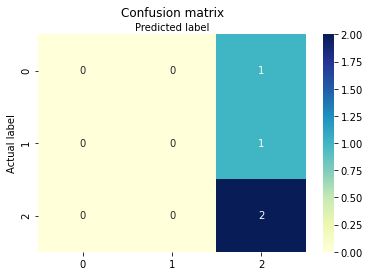

C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.50      1.00      0.67         2

    accuracy                           0.50         4
   macro avg       0.17      0.33      0.22         4
weighted avg       0.25      0.50      0.33         4

Accuracy: 0.5 

-------------------------------------------------------
Try 2 

Pred  0  2
Actl      
0     1  0
1     0  1
2     2  0


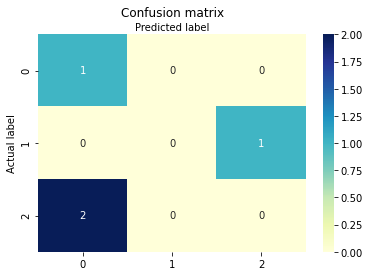

C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Report:
               precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2

    accuracy                           0.25         4
   macro avg       0.11      0.33      0.17         4
weighted avg       0.08      0.25      0.12         4

Accuracy: 0.25 

-------------------------------------------------------
Try 3 

Pred  1  2
Actl      
0     0  2
1     1  0
2     0  1


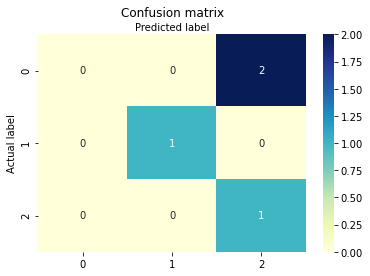

C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      1.00      1.00         1
           2       0.33      1.00      0.50         1

    accuracy                           0.50         4
   macro avg       0.44      0.67      0.50         4
weighted avg       0.33      0.50      0.38         4

Accuracy: 0.5 

-------------------------------------------------------
Try 4 

Pred  0  1  2
Actl         
1     0  1  1
2     1  0  1


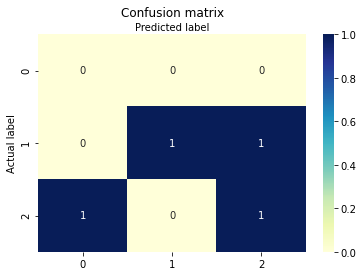

C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.50      0.67         2
           2       0.50      0.50      0.50         2

    accuracy                           0.50         4
   macro avg       0.50      0.33      0.39         4
weighted avg       0.75      0.50      0.58         4

Accuracy: 0.5 

-------------------------------------------------------
Try 5 

Pred  0  1
Actl      
2     2  2


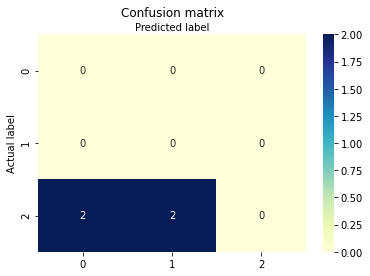

C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metr

Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00       4.0

    accuracy                           0.00       4.0
   macro avg       0.00      0.00      0.00       4.0
weighted avg       0.00      0.00      0.00       4.0

Accuracy: 0.0 

-------------------------------------------------------
Try 6 

Pred  2
Actl   
0     1
1     1
2     2


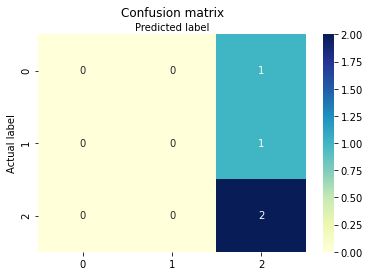

C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LIN SHI\anaconda3\lib\site-packages\skle

Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.50      1.00      0.67         2

    accuracy                           0.50         4
   macro avg       0.17      0.33      0.22         4
weighted avg       0.25      0.50      0.33         4

Accuracy: 0.5 

-------------------------------------------------------
Try 7 

Pred  0  1
Actl      
0     1  0
1     0  2
2     1  0


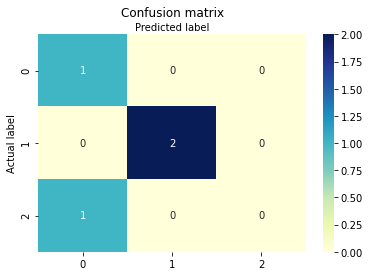

C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      1.00      1.00         2
           2       0.00      0.00      0.00         1

    accuracy                           0.75         4
   macro avg       0.50      0.67      0.56         4
weighted avg       0.62      0.75      0.67         4

Accuracy: 0.75 

-------------------------------------------------------
Try 8 

Pred  2
Actl   
0     2
1     1
2     1


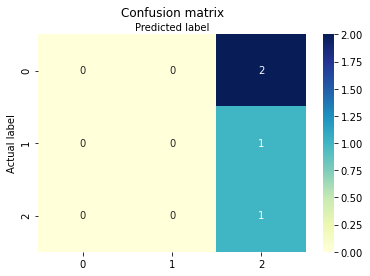

C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         1
           2       0.25      1.00      0.40         1

    accuracy                           0.25         4
   macro avg       0.08      0.33      0.13         4
weighted avg       0.06      0.25      0.10         4

Accuracy: 0.25 

-------------------------------------------------------
Try 9 

Pred  0  1
Actl      
0     1  0
1     0  1
2     0  2


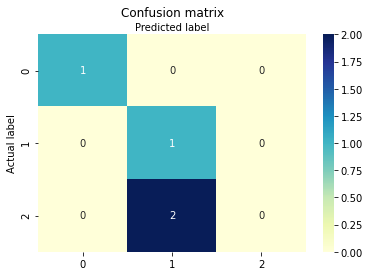

C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LIN SHI\anaconda3\lib\site-packages\skle

Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.33      1.00      0.50         1
           2       0.00      0.00      0.00         2

    accuracy                           0.50         4
   macro avg       0.44      0.67      0.50         4
weighted avg       0.33      0.50      0.38         4

Accuracy: 0.5 

-------------------------------------------------------
Try 10 

Pred  1
Actl   
1     1
2     3


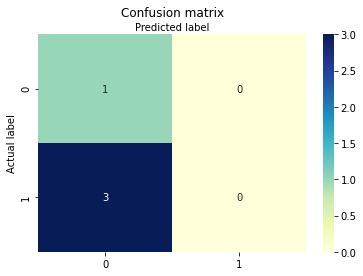

C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Report:
               precision    recall  f1-score   support

           1       0.25      1.00      0.40         1
           2       0.00      0.00      0.00         3

    accuracy                           0.25         4
   macro avg       0.12      0.50      0.20         4
weighted avg       0.06      0.25      0.10         4

Accuracy: 0.25 

-------------------------------------------------------
Try 11 

Pred  0  1
Actl      
0     1  0
1     0  1
2     2  0


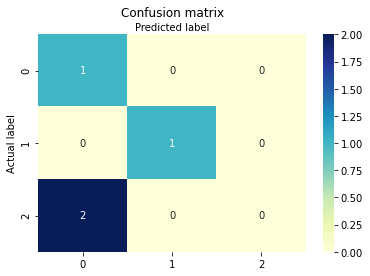

C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Report:
               precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         2

    accuracy                           0.50         4
   macro avg       0.44      0.67      0.50         4
weighted avg       0.33      0.50      0.38         4

Accuracy: 0.5 

-------------------------------------------------------
Try 12 

Pred  1  2
Actl      
1     2  0
2     0  2


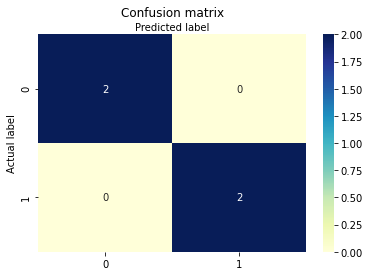

Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

Accuracy: 1.0 

-------------------------------------------------------
Try 13 



C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pred  1  2
Actl      
0     0  1
1     1  0
2     0  2


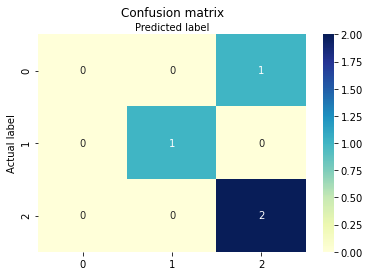

C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LIN SHI\anaconda3\lib\site-packages\skle

Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         1
           2       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.56      0.67      0.60         4
weighted avg       0.58      0.75      0.65         4

Accuracy: 0.75 

-------------------------------------------------------
Try 14 

Pred  1  2
Actl      
0     0  1
1     1  0
2     0  2


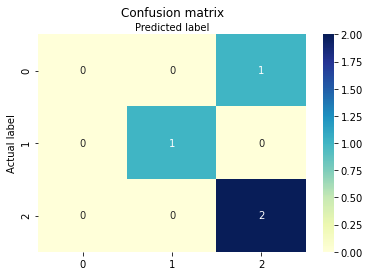

C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         1
           2       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.56      0.67      0.60         4
weighted avg       0.58      0.75      0.65         4

Accuracy: 0.75 

-------------------------------------------------------
Try 15 

Pred  1  2
Actl      
0     0  2
1     1  0
2     0  1


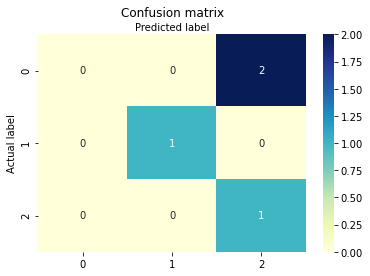

C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      1.00      1.00         1
           2       0.33      1.00      0.50         1

    accuracy                           0.50         4
   macro avg       0.44      0.67      0.50         4
weighted avg       0.33      0.50      0.38         4

Accuracy: 0.5 

-------------------------------------------------------
Try 16 

Pred  1
Actl   
1     3
2     1


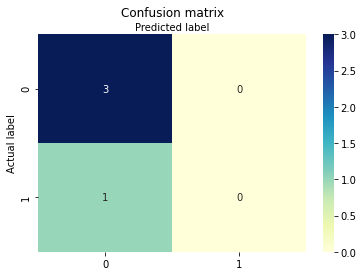

C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Report:
               precision    recall  f1-score   support

           1       0.75      1.00      0.86         3
           2       0.00      0.00      0.00         1

    accuracy                           0.75         4
   macro avg       0.38      0.50      0.43         4
weighted avg       0.56      0.75      0.64         4

Accuracy: 0.75 

-------------------------------------------------------
Try 17 

Pred  1  2
Actl      
1     2  0
2     1  1


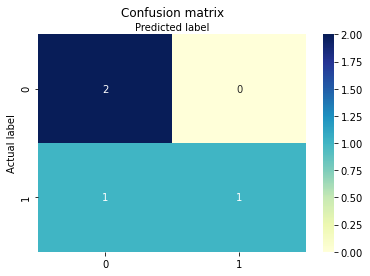

Report:
               precision    recall  f1-score   support

           1       0.67      1.00      0.80         2
           2       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4

Accuracy: 0.75 

-------------------------------------------------------
Try 18 

Pred  1  2
Actl      
0     0  1
1     0  1
2     1  1


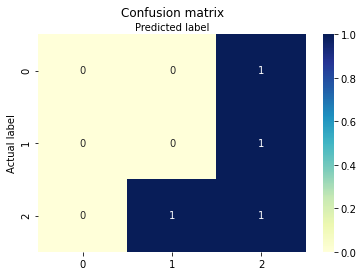

C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.33      0.50      0.40         2

    accuracy                           0.25         4
   macro avg       0.11      0.17      0.13         4
weighted avg       0.17      0.25      0.20         4

Accuracy: 0.25 

-------------------------------------------------------
Try 19 

Pred  0  2
Actl      
0     0  1
2     2  1


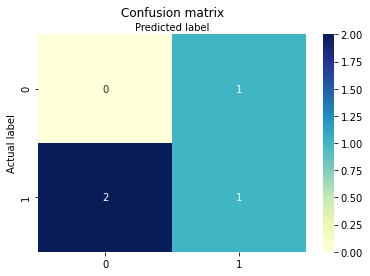

Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           2       0.50      0.33      0.40         3

    accuracy                           0.25         4
   macro avg       0.25      0.17      0.20         4
weighted avg       0.38      0.25      0.30         4

Accuracy: 0.25 

-------------------------------------------------------
Try 20 

Pred  0  1  2
Actl         
1     0  1  0
2     2  0  1


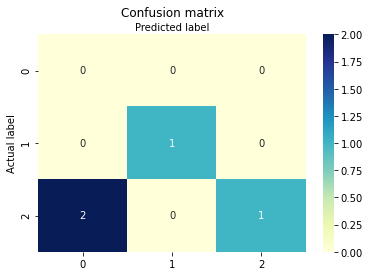

Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      1.00      1.00         1
           2       1.00      0.33      0.50         3

    accuracy                           0.50         4
   macro avg       0.67      0.44      0.50         4
weighted avg       1.00      0.50      0.62         4

Accuracy: 0.5 


Accuracy Array: [0.5  0.25 0.5  0.5  0.   0.5  0.75 0.25 0.5  0.25 0.5  1.   0.75 0.75
 0.5  0.75 0.75 0.25 0.25 0.5 ]
Accuracy Mean: 0.5
Accuracy Population SD: 0.23717082451262844
Accuracy Sample SD: 0.2433321316961438
Accuracy SEM: 0.05441071875825087


C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [165]:
### Accuracy is different for each loop because different 80/20 train/test datasets are chosen.

X = df_2010to2020_peace.drop(['Sum', 'Group', 'Group Name'], axis=1)
y = df_2010to2020_peace['Group']

loop = 20
accuracy_arr = np.zeros(loop)

for x in range(loop):
    
    print('-------------------------------------------------------')
    print('Try', x+1, '\n')
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

    LRmodel.fit(X_train,y_train)

    # compute predictions
    y_prab=LRmodel.predict_proba(X_test)
    y_pred = find_max_index_nparray(y_prab)
    
    print_simple_confusion_matrx(y_test, y_pred)
    print_pretty_confusion_matrx(y_test, y_pred, [0,1,2])
    print_curr_pred_report(y_test, y_pred)
    
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy, '\n')
    
    ### fill accuracy data in an array
    accuracy_arr[x] = accuracy
    
print_accuracy_report(accuracy_arr)

### LR2: All to Predict One

In [166]:
### define the multinomial logistic regression model
LRmodel = LogisticRegression(C=10000, multi_class='multinomial', solver='lbfgs', max_iter=200)

In [167]:
### converts prediction a multinomial probability for each input example.

def max_index(y_prab):
    
    if y_prab[0] == y_prab.max():
        return 0
    elif y_prab[1] == y_prab.max():
        return 1
    else:
        return 2

In [168]:
### input: a numpy data in which all test data is put in the last column,
### output: a predict array that is generated by using n-1 rows to predict 1 left

def all_to_pred_one(adata):
    rows,cols=adata.shape
    predict=np.zeros((rows))
    
    ### remove row i, train all else, test i
    for m in range(rows):
        ### np.delete(data, index, axis) return what is left
        adatam1=np.delete(adata, m, 0)
        X_train=np.delete(adatam1, cols-1, 1)
        y_train=adatam1[:,cols-1]
        
        LRmodel.fit(X_train,y_train)
        X_test=adata[m,0:cols-1]
        X_test=X_test.reshape(1, -1)
        predict[m]=max_index(LRmodel.predict_proba(X_test)[0])
    return predict

-------------------------------------------------------
Try 1 

Pred  0.0  1.0  2.0
Actl               
0.0     0    0    4
1.0     0    5    1
2.0     1    2    5


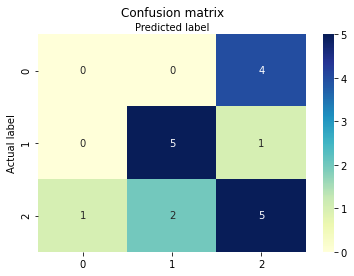

Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         4
         1.0       0.71      0.83      0.77         6
         2.0       0.50      0.62      0.56         8

    accuracy                           0.56        18
   macro avg       0.40      0.49      0.44        18
weighted avg       0.46      0.56      0.50        18

Accuracy: 0.5555555555555556 


Accuracy Array: [0.55555556]
Accuracy Mean: 0.5555555555555556
Accuracy Population SD: 0.0
Accuracy Sample SD: nan
Accuracy SEM: nan


C:\Users\LIN SHI\anaconda3\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\LIN SHI\anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [169]:
### use method pd.DataFrame(df).to_numpy() to convert dataframe to numpy array
data = df_2010to2020_peace.drop(['Sum', 'Group Name'], axis=1)
adata = pd.DataFrame(data).to_numpy()
rows,cols=adata.shape

loop = 1
accuracy_arr = np.zeros(loop)

for x in range(loop):

    print('-------------------------------------------------------')
    print('Try', x+1, '\n')
    
    y_test=y_train=adata[:,cols-1]
    y_pred=all_to_pred_one(adata)

    print_simple_confusion_matrx(y_test, y_pred)
    print_pretty_confusion_matrx(y_test, y_pred, [0,1,2])
    print_curr_pred_report(y_test, y_pred)
    
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy, '\n')
    
    ### fill accuracy data in an array
    accuracy_arr[x] = accuracy
          
print_accuracy_report(accuracy_arr)

### LR3: Random Prediction

### LR4: Training on Extremes

-------------------------------------------------------
Try 1 

Pred  0.0  1.0
Actl          
0.0     4    0
1.0     0    6


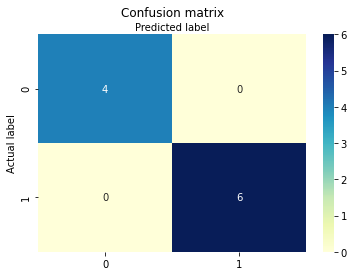

Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         4
         1.0       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

Accuracy: 1.0 


Accuracy Array: [1.]
Accuracy Mean: 1.0
Accuracy Population SD: 0.0
Accuracy Sample SD: nan
Accuracy SEM: nan


C:\Users\LIN SHI\anaconda3\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\LIN SHI\anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [170]:
### 6 peaceful and 4 non-peaceful countries

### use method pd.DataFrame(df).to_numpy() to convert dataframe to numpy array
df_2010to2020_peace_NoNeut = df_2010to2020_peace.drop(index=['Ghana GH', 'Hong Kong HK', 'India IN', 'Jamaica JM', 'Sri Lanka LK', 'Malaysia MY', 'Philippines PH', 'United States US'])
data = df_2010to2020_peace_NoNeut.drop(['Sum', 'Group Name'], axis=1)
adata = data.to_numpy()
rows,cols=adata.shape

loop = 1
accuracy_arr = np.zeros(loop)

for x in range(loop):

    print('-------------------------------------------------------')
    print('Try', x+1, '\n')

    y_test=y_train=adata[:,cols-1]
    y_pred=all_to_pred_one(adata)

    print_simple_confusion_matrx(y_test, y_pred)
    print_pretty_confusion_matrx(y_test, y_pred, [0,1])
    print_curr_pred_report(y_test, y_pred)
        
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy, '\n')
    
    ### fill accuracy data in an array
    accuracy_arr[x] = accuracy
          
print_accuracy_report(accuracy_arr)

### Peace Index

In [171]:
# hours = [0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]
# passfail = [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1]

# logregtest = pd.DataFrame()
# logregtest["Hours"] = hours
# logregtest["Pass"] = passfail

# logregtest

# x = logregtest.Hours
# y = logregtest.Pass

# plt.scatter(x, y)
# plt.show()

logreg = LogisticRegression(C=10000, solver='lbfgs', multi_class='ovr')
# #Convert a 1D array to a 2D array in numpy
# x = x.values.reshape(-1,1)
# #Run Logistic Regression
# logreg.fit(x, y)

# x

# hours = np.arange(0, 10, 0.5)
# probabilities = []
# for i in hours:
#     p_fail, p_pass = logreg.predict_proba([[i]])[0]
#     probabilities.append(p_pass)

# plt.scatter(hours,probabilities)
# plt.title("Logistic Regression Model")
# plt.xlabel('Hours')
# plt.ylabel('Status (1:Pass, 0:Fail)')
# plt.show()

# logreg.coef_

# logreg.intercept_

# for i in logreg.coef_:
#     for j in i:
#         print(j)
#         log_co = j
        
# for i in logreg.intercept_:
#     print(i)
#     log_int = i   
    
# print('p(passing for 2 hours studying) = ', "{:.0%}".format(1 / (1 + exp(-1 * (log_co*2 + log_int)))))
# print('p(passing for 4 hours studying) = ', "{:.0%}".format(1 / (1 + exp(-1 * (log_co*4 + log_int)))))

### Peaceful and Non-Peaceful Countries

In [172]:
# data = df_2010to2020_peace_NoNeut.drop(['Sum', 'Group Name'], axis=1)
# adata = data.to_numpy()

# display(adata.shape)
# display(data)

In [173]:
ytrain = data.loc[:,'Group'].values
# display(ytrain)

In [174]:
xtrain = data.drop(columns=['Group']).to_numpy()
# display(xtrain)

In [175]:
model = logreg.fit(xtrain, ytrain)
# display(model.intercept_)
# display(model.coef_)

In [176]:
df_2010to2020_words.columns[0:-1]

Index(['abdul', 'able', 'abut', 'access', 'accord', 'according', 'account',
       'accra', 'accrding', 'accuse',
       ...
       'wuld', 'yea', 'year', 'yesterday', 'yet', 'young', 'youth', 'yu',
       'yung', 'yur'],
      dtype='object', length=887)

In [177]:
### produce a dataframe to show coefficient for each word
  
### creates Dataframe
df_words_coef = pd.DataFrame({
    'Words' : df_2010to2020_words.columns[0:-1],
    'Coefficient' : model.coef_[0]
})

### sorting in decending order by absolute value of Coefficient
df_words_coef = df_words_coef.reindex(df_words_coef.Coefficient.abs().sort_values(ascending=False).index)
# display(df_words_coef)

In [178]:
### Adding intercept value at top

new_row = pd.DataFrame({'Words': 'Intercept', 'Coefficient' : model.intercept_}, index = [0])
df_words_coef_sort = pd.concat([new_row, df_words_coef]).reset_index(drop = True)
# display(df_words_coef_sort)

In [179]:
### These are all middle countries that we need to predict

df_2010to2020_peace_AllNeut = df_2010to2020_peace.drop(index=['Australia AU', 'Bangladesh BD', 'Canada CA', 'United Kingdom GB', 'Ireland IE', 'Kenya KE', 'Nigeria NG', 'New Zealand NZ', 'Singapore SG', 'Tanzania TZ'])
df_xtest = df_2010to2020_peace_AllNeut.drop(['Sum', 'Group', 'Group Name'], axis=1)
# display(df_xtest)

### ML1: Use Build-in Method to Predict Middle Countries

In [180]:
# xtest = df_xtest.to_numpy()
# prob_pred = model.predict_proba(xtest)
# #print(prob_pred)

# print('Predictions (probablility to be a peaceful country):')
# print('Ghana GH: ', "{:.2%}".format(prob_pred[0][1]))
# print('Hong Kong HK: ', "{:.2%}".format(prob_pred[1][1]))
# print('India IN: ', "{:.2%}".format(prob_pred[2][1]))
# print('Jamaica JM: ', "{:.2%}".format(prob_pred[3][1]))
# print('Sri Lanka LK: ', "{:.2%}".format(prob_pred[4][1]))
# print('Malaysia MY: ', "{:.2%}".format(prob_pred[5][1]))
# print('Philippines PH: ', "{:.2%}".format(prob_pred[6][1]))
# print('United States US: ', "{:.2%}".format(prob_pred[7][1]))

### ML2: Use Formula to Predict Middle Countries

In [181]:
GH = df_xtest.to_numpy()[0]
HK = df_xtest.to_numpy()[1]
IN = df_xtest.to_numpy()[2]
JM = df_xtest.to_numpy()[3]
LK = df_xtest.to_numpy()[4]
MY = df_xtest.to_numpy()[5]
PH = df_xtest.to_numpy()[6]
US = df_xtest.to_numpy()[7]

# Make a function
# input: numpy array of word percentage of a neutral country
# output: Predictions (probablility to be a peaceful country)

def possibility_peace(country):
    product = model.coef_[0] * country
    total = 0
    for i in product:
        total = total + i
        p = 1 / (1 + exp(-1 * (total + model.intercept_)))
    return p

print('Predictions (probablility to be a peaceful country):')
print('Ghana GH: ', "{:.2%}".format(possibility_peace(GH)))
print('Hong Kong HK: ', "{:.2%}".format(possibility_peace(HK)))
print('India IN: ', "{:.2%}".format(possibility_peace(IN)))
print('Jamaica JM: ', "{:.2%}".format(possibility_peace(JM)))
print('Sri Lanka LK: ', "{:.2%}".format(possibility_peace(LK)))
print('Malaysia MY: ', "{:.2%}".format(possibility_peace(MY)))
print('Philippines PH: ', "{:.2%}".format(possibility_peace(PH)))
print('United States US: ', "{:.2%}".format(possibility_peace(US)))

Predictions (probablility to be a peaceful country):
Ghana GH:  14.96%
Hong Kong HK:  57.13%
India IN:  55.43%
Jamaica JM:  45.68%
Sri Lanka LK:  16.33%
Malaysia MY:  48.47%
Philippines PH:  62.98%
United States US:  91.99%


### Use Formula to Predict Extreme Countries

In [182]:
AU = xtrain[0]
BD = xtrain[1]
CA = xtrain[2]
GB = xtrain[3]
IE = xtrain[4]
KE = xtrain[5]
NG = xtrain[6]
NZ = xtrain[7]
SG = xtrain[8]
TZ = xtrain[9]

In [183]:
print('Predictions (probablility to be a peaceful country):')
print('Australia AU (1): ', "{:.2%}".format(possibility_peace(AU)))
print('Bangladesh BD (0): ', "{:.2%}".format(possibility_peace(BD)))
print('Canada CA (1): ', "{:.2%}".format(possibility_peace(CA)))
print('United Kingdom GB (1): ', "{:.2%}".format(possibility_peace(GB)))
print('Ireland IE (1): ', "{:.2%}".format(possibility_peace(IE)))
print('Kenya KE (0): ', "{:.2%}".format(possibility_peace(KE)))
print('Nigeria NG (0): ', "{:.2%}".format(possibility_peace(NG)))
print('New Zealand NZ (1): ', "{:.2%}".format(possibility_peace(NZ)))
print('Singapore SG (1): ', "{:.2%}".format(possibility_peace(SG)))
print('Tanzania TZ (0): ', "{:.2%}".format(possibility_peace(TZ)))

Predictions (probablility to be a peaceful country):
Australia AU (1):  94.99%
Bangladesh BD (0):  10.90%
Canada CA (1):  93.34%
United Kingdom GB (1):  94.15%
Ireland IE (1):  94.54%
Kenya KE (0):  14.24%
Nigeria NG (0):  7.48%
New Zealand NZ (1):  95.56%
Singapore SG (1):  88.18%
Tanzania TZ (0):  6.62%
